<a href="https://colab.research.google.com/github/vjmiyagi/DS-Unit-2-Linear-Models/blob/master/module1-regression-1/VJMLS_DSPT6_211_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 1, Module 1*

---

# Regression 1

## Assignment

You'll use another **New York City** real estate dataset. 

But now you'll **predict how much it costs to rent an apartment**, instead of how much it costs to buy a condo.

The data comes from renthop.com, an apartment listing website.

- [ ] Look at the data. Choose a feature, and plot its relationship with the target.
- [ ] Use scikit-learn for linear regression with one feature. You can follow the [5-step process from Jake VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html#Basics-of-the-API).
- [ ] Define a function to make new predictions and explain the model coefficient.
- [ ] Organize and comment your code.

> [Do Not Copy-Paste.](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) You must type each of these exercises in, manually. If you copy and paste, you might as well not even do them. The point of these exercises is to train your hands, your brain, and your mind in how to read, write, and see code. If you copy-paste, you are cheating yourself out of the effectiveness of the lessons.

If your **Plotly** visualizations aren't working:
- You must have JavaScript enabled in your browser
- You probably want to use Chrome or Firefox
- You may need to turn off ad blockers
- [If you're using Jupyter Lab locally, you need to install some "extensions"](https://plot.ly/python/getting-started/#jupyterlab-support-python-35)

## Stretch Goals
- [ ] Do linear regression with two or more features.
- [ ] Read [The Discovery of Statistical Regression](https://priceonomics.com/the-discovery-of-statistical-regression/)
- [ ] Read [_An Introduction to Statistical Learning_](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf), Chapter 2.1: What Is Statistical Learning?

In [0]:
# import sys

#  If you're on Colab:
# if 'google.colab' in sys.modules:
#     DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'

#  If you're working locally:
# else:
#     DATA_PATH = '../data/'
    
# # Ignore this Numpy warning when using Plotly Express:
# # FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
# import warnings
# warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

In [0]:
# Read New York City apartment rental listing data
# import pandas as pd
# df = pd.read_csv(DATA_PATH+'apartments/renthop-nyc.csv')
# assert df.shape == (49352, 34)

In [0]:
# Remove outliers: 
# the most extreme 1% prices,
# the most extreme .1% latitudes, &
# the most extreme .1% longitudes
# df = df[(df['price'] >= 1375) & (df['price'] <= 15500) & 
#         (df['latitude'] >=40.57) & (df['latitude'] < 40.99) &
#         (df['longitude'] >= -74.1) & (df['longitude'] <= -73.38)]

# Imports and dataframe setup


In [25]:
# Imports
import sys
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import plotly.express as px

!pip install -U pandas-profiling
import pandas as pd
import seaborn as sns

from pandas_profiling import ProfileReport



Requirement already up-to-date: pandas-profiling in /usr/local/lib/python3.6/dist-packages (2.7.0)


In [0]:
# Read New York City apartment rental listing data

url  = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'

ny_df = pd.read_csv(url+'apartments/renthop-nyc.csv')
assert ny_df.shape == (49352,34)

In [0]:
# Remove outliers:
# the most extreme 1% prices,
# the most extreme .1% latitudes, & 
# the most extreme .1% longitudes

ny_df = ny_df[(ny_df['price'] >= 1375) &  (ny_df['price'] <= 15500) &
              (ny_df['latitude'] >= 40.57) & (ny_df['latitude'] <= 40.99) &
              (ny_df['longitude'] >= -74.1) & (ny_df['longitude'] <= -73.38)]

# Colab Forms does not like dashes in variable names
ny_df = ny_df.rename(columns={'pre-war': 'pre_war'})

In [0]:
# Create a new column that is a combo of bed and bath
ny_df['bed_bath'] = ny_df['bedrooms'] + (ny_df['bathrooms']/10)

In [66]:
# Need baseline dataframe with no amenities

df = ny_df
df.head()

,bathrooms,bedrooms,created,description,display_address,latitude,longitude,price,street_address,interest_level,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre_war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space,bed_bath
0,1.5,3,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,40.7145,-73.9425,3000,792 Metropolitan Avenue,medium,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.15
1,1.0,2,2016-06-12 12:19:27,,Columbus Avenue,40.7947,-73.9667,5465,808 Columbus Avenue,low,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.10
2,1.0,1,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,40.7388,-74.0018,2850,241 W 13 Street,high,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.10
3,1.0,1,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,40.7539,-73.9677,3275,333 East 49th Street,low,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.10
4,1.0,4,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,40.8241,-73.9493,3350,500 West 143rd Street,low,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.10


In [0]:
#@title Filter Building amenities { run: "auto" }

Elevator = False #@param {type:"boolean"}
Doorman = False #@param {type:"boolean"}
LaundryBldg = False #@param {type:"boolean"}
FitnessCenter = False #@param {type:"boolean"}
PreWar = False #@param {type:"boolean"}
RoofDeck = False #@param {type:"boolean"}
OutDoorSpace = False #@param {type:"boolean"}
HighSpeedInternet = False #@param {type:"boolean"}
SwimmingPool = False #@param {type:"boolean"}
NewConstruction = False #@param {type:"boolean"}
WheelchairAccess = False #@param {type:"boolean"}
CommonOutdoorSpace = False #@param {type:"boolean"}

# Restore df to size and shape with all amenities
df = ny_df

if Elevator == False:
    df = df[df['elevator'] == 0]
else:
    df = df[df['elevator'] == 1]
if Doorman == False:
    df = df[df['doorman'] == 0]
else:
    df = df[df['doorman'] == 1]
if LaundryBldg == False:
    df = df[df['laundry_in_building'] == 0]
else:
    df = df[df['laundry_in_building'] == 1]
if FitnessCenter == False:
    df = df[df['fitness_center'] == 0]
else:
    df = df[df['fitness_center'] == 1]
if PreWar == False:
    df = df[df['pre_war'] == 0]
else:
    df = df[df['pre_war'] == 1]
if RoofDeck == False:
    df = df[df['roof_deck'] == 0]
else:
    df = df[df['roof_deck'] == 1]
if OutDoorSpace == False:
    df = df[df['outdoor_space'] == 0]
else:
    df = df[df['outdoor_space'] == 1]
if HighSpeedInternet == False:
    df = df[df['high_speed_internet'] == 0]
else:
    df = df[df['high_speed_internet'] == 1]
if SwimmingPool == False:
    df = df[df['swimming_pool'] == 0]
else:
    df = df[df['swimming_pool'] == 1]
if NewConstruction == False:
    df = df[df['new_construction'] == 0]
else:
    df = df[df['new_construction'] == 1]
if WheelchairAccess == False:
    df = df[df['wheelchair_access'] == 0]
else:
    df = df[df['wheelchair_access'] == 1]
if CommonOutdoorSpace == False:
    df = df[df['common_outdoor_space'] == 0]
else:
    df = df[df['common_outdoor_space'] == 1]

# df needs new name 

df_bldg = df






In [0]:
#@title Filter Apt amenities { run: "auto" }

# Restore df to size and shape with all amenities
df_a = df_bldg

Cats = False #@param {type:"boolean"}
Dogs = False #@param {type:"boolean"}
Hardwood = False #@param {type:"boolean"}
Dishwasher = False #@param {type:"boolean"}
NoFee = False #@param {type:"boolean"}
LaundryUnit = False #@param {type:"boolean"}
DiningRoom = False #@param {type:"boolean"}
Balcony = False #@param {type:"boolean"}
Terrace = False #@param {type:"boolean"}
Exclusive = False #@param {type:"boolean"}
Loft = False #@param {type:"boolean"}
GardenPatio = False #@param {type:"boolean"}


# Index('elevator', 'cats_allowed', 'hardwood_floors',
# 'dogs_allowed', 'doorman', 'dishwasher', 'no_fee',
# 'laundry_in_building', 'fitness_center', 'pre_war',
# 'laundry_in_unit', 'roof_deck', 'outdoor_space',
# 'dining_room', 'high_speed_internet', 'balcony',
# 'swimming_pool', 'new_construction', 'terrace',
# 'exclusive', 'loft',
# 'garden_patio', 'wheelchair_access',
# 'common_outdoor_space'],
#       dtype='object')

if Cats == False:
    df_a = df_a[df_a['cats_allowed'] == 0]
else:
    df_a = df_a[df_a['cats_allowed'] == 1]
if Dogs == False:
    df_a = df_a[df_a['dogs_allowed'] == 0]
else:
    df_a = df_a[df_a['dogs_allowed'] == 1]
if Dishwasher == False:
    df_a = df_a[df_a['dishwasher'] == 0]
else:
    df_a = df_a[df_a['dishwasher'] == 1]
if NoFee == False:
    df_a = df_a[df_a['no_fee'] == 0]
else:
    df_a = df_a[df_a['no_fee'] == 1]
if LaundryUnit == False:
    df_a = df_a[df_a['laundry_in_unit'] == 0]
else:
    df_a = df_a[df_a['laundry_in_unit'] == 1]
if DiningRoom == False:
    df_a = df_a[df_a['dining_room'] == 0]
else:
    df_a = df_a[df_a['dining_room'] == 1]
if Balcony == False:
    df_a = df_a[df_a['balcony'] == 0]
else:
    df_a = df_a[df_a['balcony'] == 1]
if Terrace == False:
    df_a = df_a[df_a['terrace'] == 0]
else:
    df_a = df_a[df_a['terrace'] == 1]
if Exclusive == False:
    df_a = df_a[df_a['exclusive'] == 0]
else:
    df_a = df_a[df_a['exclusive'] == 1]
if Loft == False:
    df_a = df_a[df_a['loft'] == 0]
else:
    df_a = df_a[df_a['loft'] == 1]
if GardenPatio == False:
    df_a = df_a[df_a['garden_patio'] == 0]
else:
    df_a = df_a[df_a['garden_patio'] == 1]

# df needs new name 

df_am = df_a



In [0]:
# Drop feature columns and create smaller DataFrame df

df = df_am.drop(['elevator', 'cats_allowed', 'hardwood_floors', 'dogs_allowed',
                 'doorman', 'dishwasher','no_fee', 'laundry_in_building',
                 'fitness_center', 'pre_war', 'laundry_in_unit', 'roof_deck',
                 'outdoor_space', 'dining_room', 'high_speed_internet',
                 'balcony', 'swimming_pool', 'new_construction', 'terrace',
                 'exclusive', 'loft', 'garden_patio', 'wheelchair_access',
                 'common_outdoor_space'], axis=1)

# Create a backupcopy
df1 = df

In [101]:
df.shape

(4946, 11)

# Analyze DataFrame

In [0]:
#@title Set number of Bedrooms { run: "auto" }
bedrms = 0 #@param {type:"integer"}
# Restore data from backup copy
df = df1

condition = df['bedrooms']==bedrms
df = df[condition]

In [125]:
# Set up and run Pandas Profiling Report on barebones df
profile = ProfileReport(df, title='Pandas Profiling Report',
                        html={'style':{'full_width':True}})
profile.to_notebook_iframe()

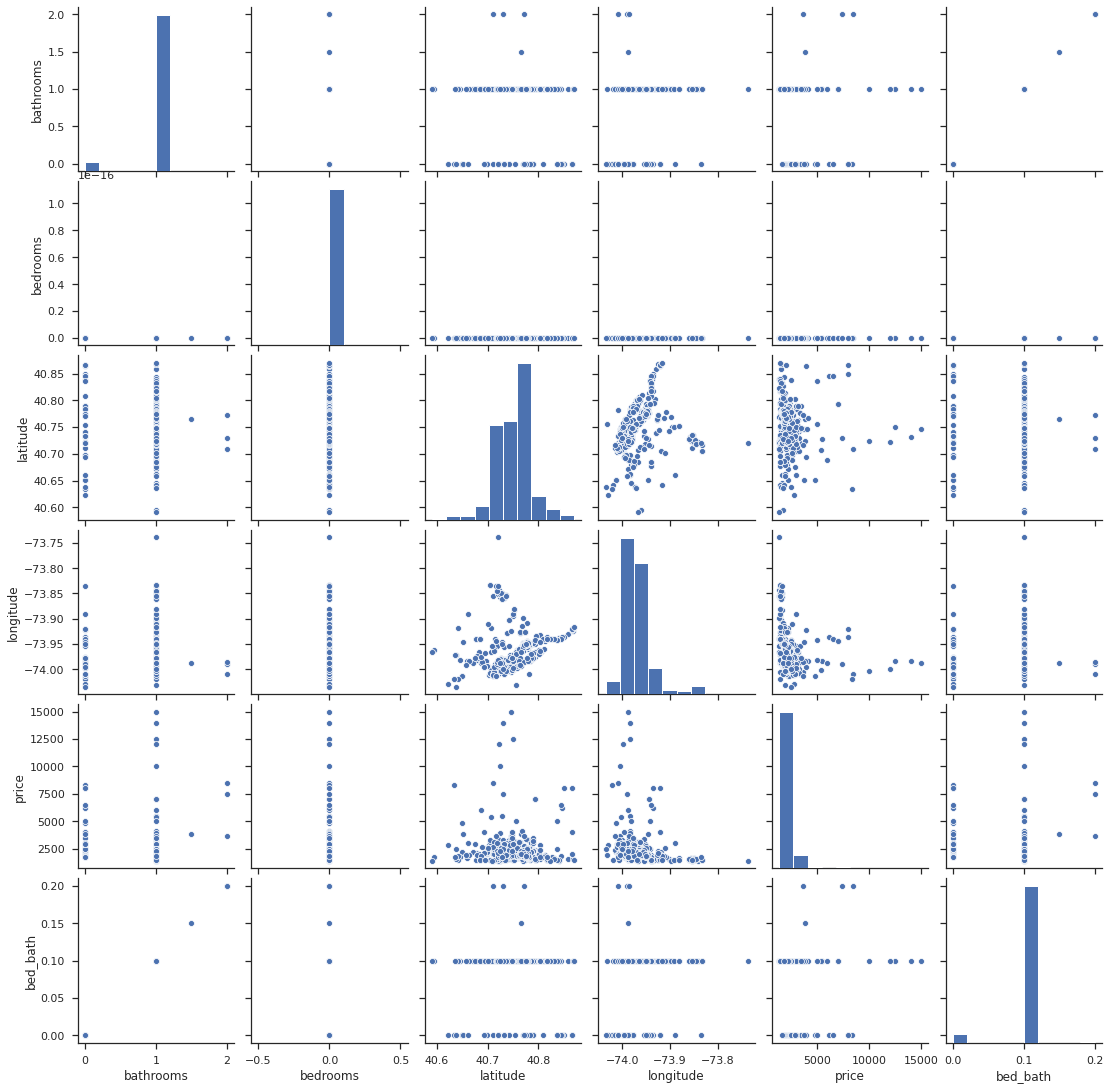

In [126]:
# Run Seaborn pairplot on barebones df

sns.set(style='ticks', color_codes=True)
ny = sns.pairplot(df)

# Linear Regression with one feature using scikit-learn

The cell for bedrooms accepts input and autoruns after initial run.

In [151]:
#@title Set number of Bedrooms { run: "auto" }
bedrms = 3 #@param {type:"integer"}
# Restore data from backup copy
df = df1

condition = df['bedrooms']==bedrms
df = df[condition]

print('Please enter an integer from 0 to ', max(df1['bedrooms']))

# Set up X and Y target vectors

features = ['bed_bath']
target = ['price']

x_train = df[features]
y_train = df[target]

# Set up linear regression model
model = LinearRegression(fit_intercept=True)

# Fit the model
model.fit(x_train, y_train)

# Predictive Model

fig = px.scatter(df, x = 'bed_bath', y = 'price', trendline='ols')
fig.show()
print('Bedrooms are before the deimal point, bathrooms are after.')
print('For example, 0.15 indicates zero bedrooms with 1 and 1/2 baths')


Please enter an integer from 0 to  6


Bedrooms are before the deimal point, bathrooms are after.
For example, 0.15 indicates zero bedrooms with 1 and 1/2 baths


# Define a function to make new predictions and explain the model coefficient.

In [0]:
#@title Filter Building amenities { run: "auto" }

Elevator = True #@param {type:"boolean"}
Doorman = False #@param {type:"boolean"}
LaundryBldg = False #@param {type:"boolean"}
FitnessCenter = False #@param {type:"boolean"}
PreWar = False #@param {type:"boolean"}
RoofDeck = False #@param {type:"boolean"}
OutDoorSpace = False #@param {type:"boolean"}
HighSpeedInternet = False #@param {type:"boolean"}
SwimmingPool = False #@param {type:"boolean"}
NewConstruction = False #@param {type:"boolean"}
WheelchairAccess = False #@param {type:"boolean"}
CommonOutdoorSpace = False #@param {type:"boolean"}

# Function to plot prediction
def myfunction(df):
    # Set up X and Y target vectors

    features = ['bed_bath']
    target = ['price']

    x_train = df[features]
    y_train = df[target]

    # Set up linear regression model
    model = LinearRegression(fit_intercept=True)

    # Fit the model
    model.fit(x_train, y_train)

    # Predictive Model

    fig = px.scatter(df, x = 'bed_bath', y = 'price', trendline='ols')
    fig.show()
    print('Bedrooms are before the deimal point, bathrooms are after.')
    print('For example, 0.15 indicates zero bedrooms with 1 and 1/2 baths')    









# Restore df to size and shape with all amenities
df = ny_df

if Elevator == False:
    df = df[df['elevator'] == 0]
else:
    df = df[df['elevator'] == 1]
if Doorman == False:
    df = df[df['doorman'] == 0]
else:
    df = df[df['doorman'] == 1]
if LaundryBldg == False:
    df = df[df['laundry_in_building'] == 0]
else:
    df = df[df['laundry_in_building'] == 1]
if FitnessCenter == False:
    df = df[df['fitness_center'] == 0]
else:
    df = df[df['fitness_center'] == 1]
if PreWar == False:
    df = df[df['pre_war'] == 0]
else:
    df = df[df['pre_war'] == 1]
if RoofDeck == False:
    df = df[df['roof_deck'] == 0]
else:
    df = df[df['roof_deck'] == 1]
if OutDoorSpace == False:
    df = df[df['outdoor_space'] == 0]
else:
    df = df[df['outdoor_space'] == 1]
if HighSpeedInternet == False:
    df = df[df['high_speed_internet'] == 0]
else:
    df = df[df['high_speed_internet'] == 1]
if SwimmingPool == False:
    df = df[df['swimming_pool'] == 0]
else:
    df = df[df['swimming_pool'] == 1]
if NewConstruction == False:
    df = df[df['new_construction'] == 0]
else:
    df = df[df['new_construction'] == 1]
if WheelchairAccess == False:
    df = df[df['wheelchair_access'] == 0]
else:
    df = df[df['wheelchair_access'] == 1]
if CommonOutdoorSpace == False:
    df = df[df['common_outdoor_space'] == 0]
else:
    df = df[df['common_outdoor_space'] == 1]

# df needs new name 

df_bldg = df






In [0]:
#@title Filter Apt amenities { run: "auto" }

# Restore df to size and shape with all amenities
df_a = df_bldg

Cats = False #@param {type:"boolean"}
Dogs = False #@param {type:"boolean"}
Hardwood = False #@param {type:"boolean"}
Dishwasher = False #@param {type:"boolean"}
NoFee = False #@param {type:"boolean"}
LaundryUnit = False #@param {type:"boolean"}
DiningRoom = False #@param {type:"boolean"}
Balcony = False #@param {type:"boolean"}
Terrace = False #@param {type:"boolean"}
Exclusive = False #@param {type:"boolean"}
Loft = False #@param {type:"boolean"}
GardenPatio = False #@param {type:"boolean"}


# Index('elevator', 'cats_allowed', 'hardwood_floors',
# 'dogs_allowed', 'doorman', 'dishwasher', 'no_fee',
# 'laundry_in_building', 'fitness_center', 'pre_war',
# 'laundry_in_unit', 'roof_deck', 'outdoor_space',
# 'dining_room', 'high_speed_internet', 'balcony',
# 'swimming_pool', 'new_construction', 'terrace',
# 'exclusive', 'loft',
# 'garden_patio', 'wheelchair_access',
# 'common_outdoor_space'],
#       dtype='object')

if Cats == False:
    df_a = df_a[df_a['cats_allowed'] == 0]
else:
    df_a = df_a[df_a['cats_allowed'] == 1]
if Dogs == False:
    df_a = df_a[df_a['dogs_allowed'] == 0]
else:
    df_a = df_a[df_a['dogs_allowed'] == 1]
if Dishwasher == False:
    df_a = df_a[df_a['dishwasher'] == 0]
else:
    df_a = df_a[df_a['dishwasher'] == 1]
if NoFee == False:
    df_a = df_a[df_a['no_fee'] == 0]
else:
    df_a = df_a[df_a['no_fee'] == 1]
if LaundryUnit == False:
    df_a = df_a[df_a['laundry_in_unit'] == 0]
else:
    df_a = df_a[df_a['laundry_in_unit'] == 1]
if DiningRoom == False:
    df_a = df_a[df_a['dining_room'] == 0]
else:
    df_a = df_a[df_a['dining_room'] == 1]
if Balcony == False:
    df_a = df_a[df_a['balcony'] == 0]
else:
    df_a = df_a[df_a['balcony'] == 1]
if Terrace == False:
    df_a = df_a[df_a['terrace'] == 0]
else:
    df_a = df_a[df_a['terrace'] == 1]
if Exclusive == False:
    df_a = df_a[df_a['exclusive'] == 0]
else:
    df_a = df_a[df_a['exclusive'] == 1]
if Loft == False:
    df_a = df_a[df_a['loft'] == 0]
else:
    df_a = df_a[df_a['loft'] == 1]
if GardenPatio == False:
    df_a = df_a[df_a['garden_patio'] == 0]
else:
    df_a = df_a[df_a['garden_patio'] == 1]

# df needs new name  Back to df for simplicity

df = df_a



In [209]:
#@title Set number of Bedrooms { run: "auto" }
bedrms = 3 #@param {type:"integer"}
# Restore data from backup copy

df = df_a

condition = df['bedrooms']==bedrms
df = df[condition]

myfunction(df)

Bedrooms are before the deimal point, bathrooms are after.
For example, 0.15 indicates zero bedrooms with 1 and 1/2 baths
